In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

dfSalida = pd.read_csv("salida.csv")
dfSalida.head()

,Procesador,tCalculo,tComm,Chunk
0,4,1.270668,0.142497,1000.0
1,1,1.417196,0.000467,1000.0
2,3,1.416546,0.011533,1000.0
3,0,1.413341,0.015510,1000.0
4,2,1.427948,0.000652,1000.0


In [2]:
df1 = dfSalida[dfSalida["Procesador"] == 0].sort_values(by="Chunk")
df2 = dfSalida[dfSalida["Procesador"] == 1].sort_values(by="Chunk")
df3 = dfSalida[dfSalida["Procesador"] == 2].sort_values(by="Chunk")
df4 = dfSalida[dfSalida["Procesador"] == 3].sort_values(by="Chunk")
df5 = dfSalida[dfSalida["Procesador"] == 4].sort_values(by="Chunk")


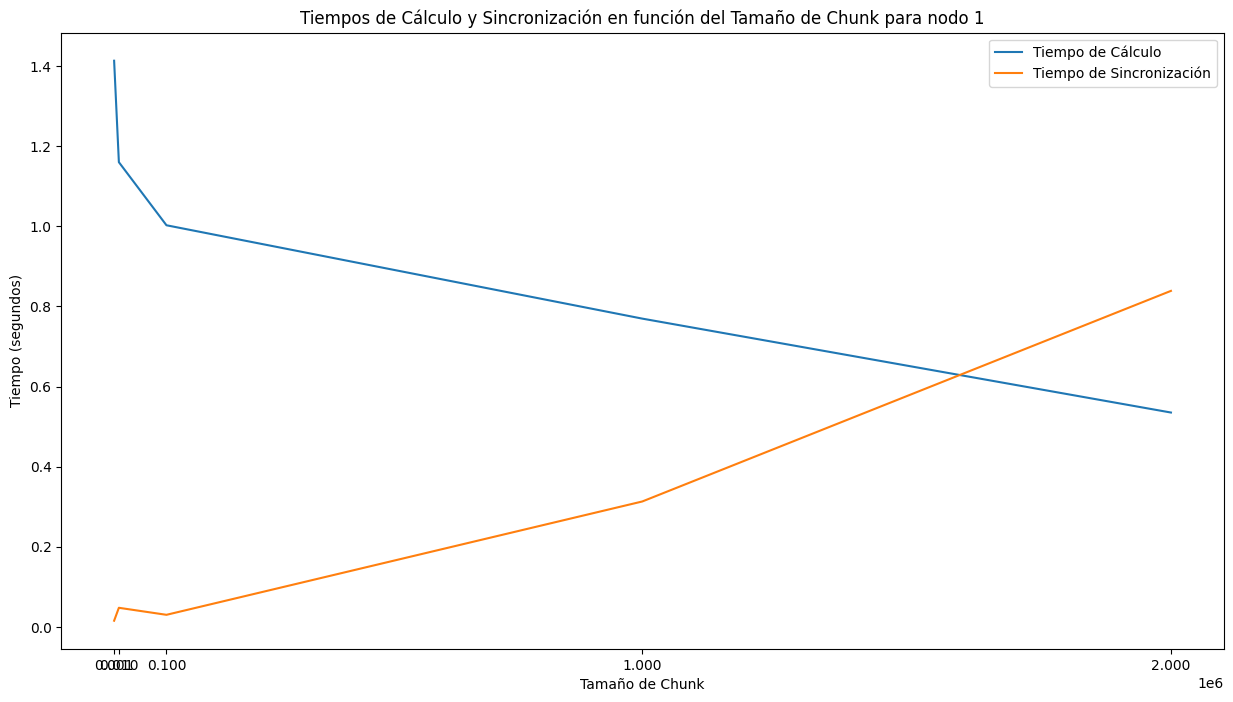

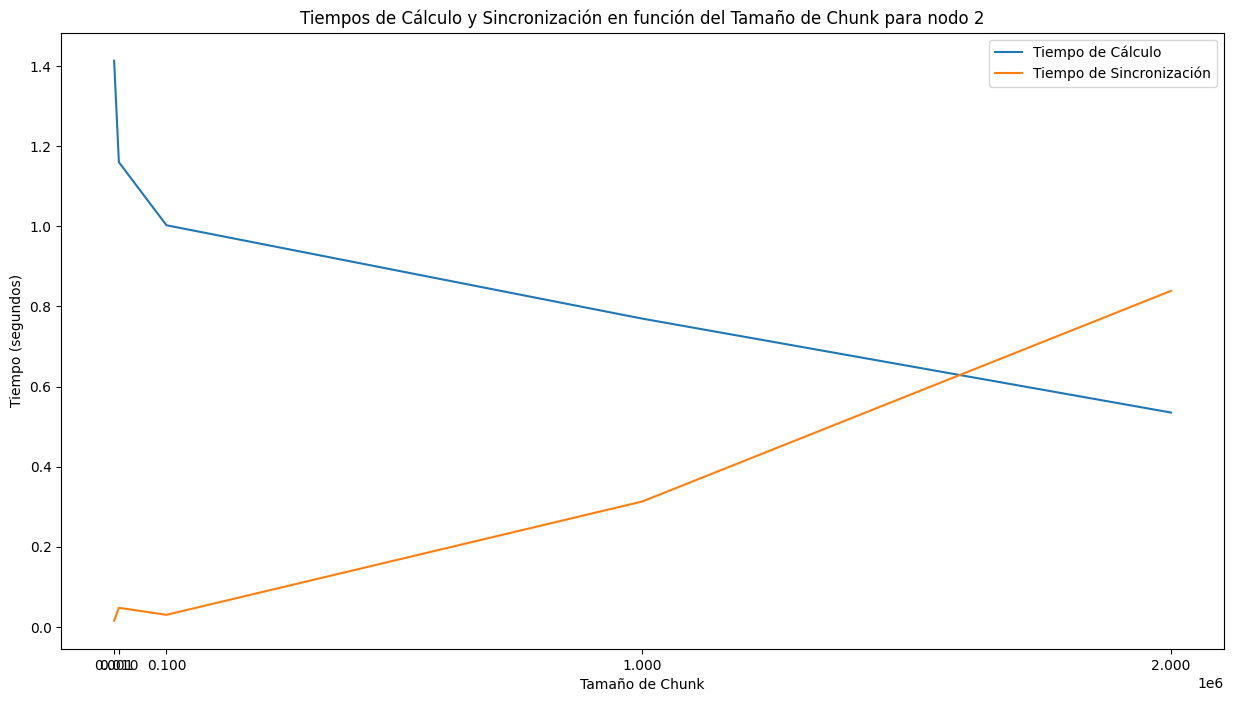

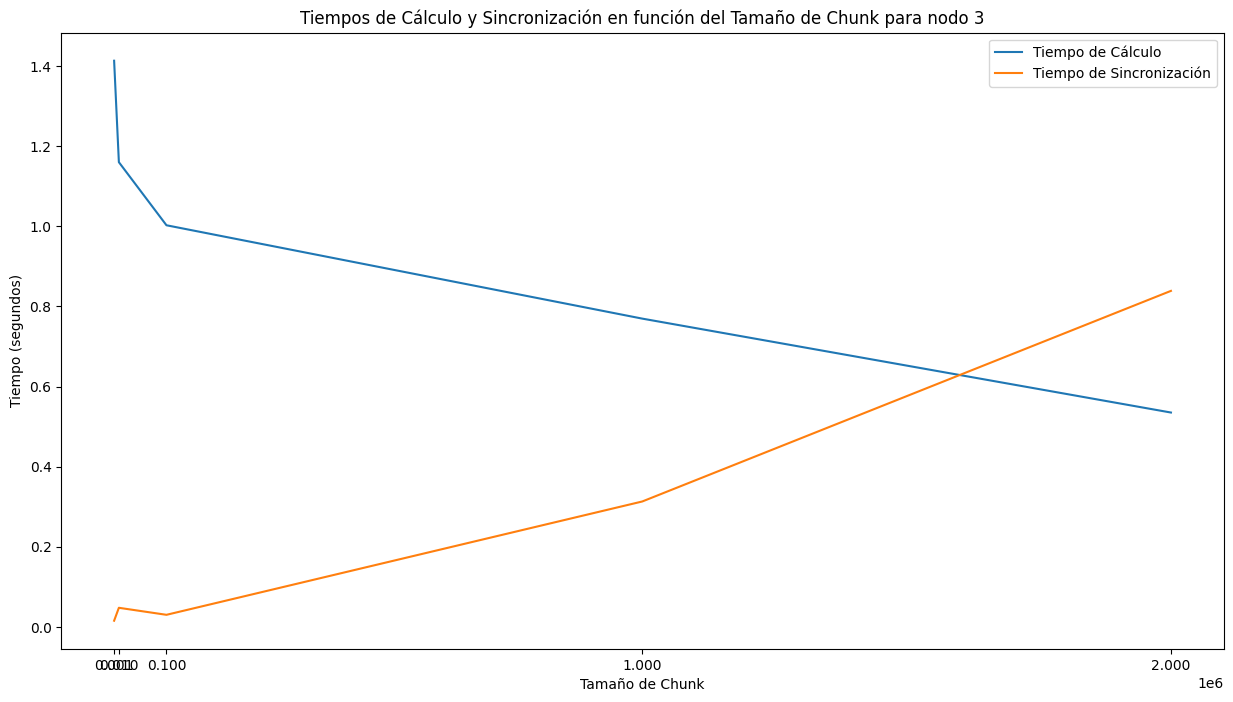

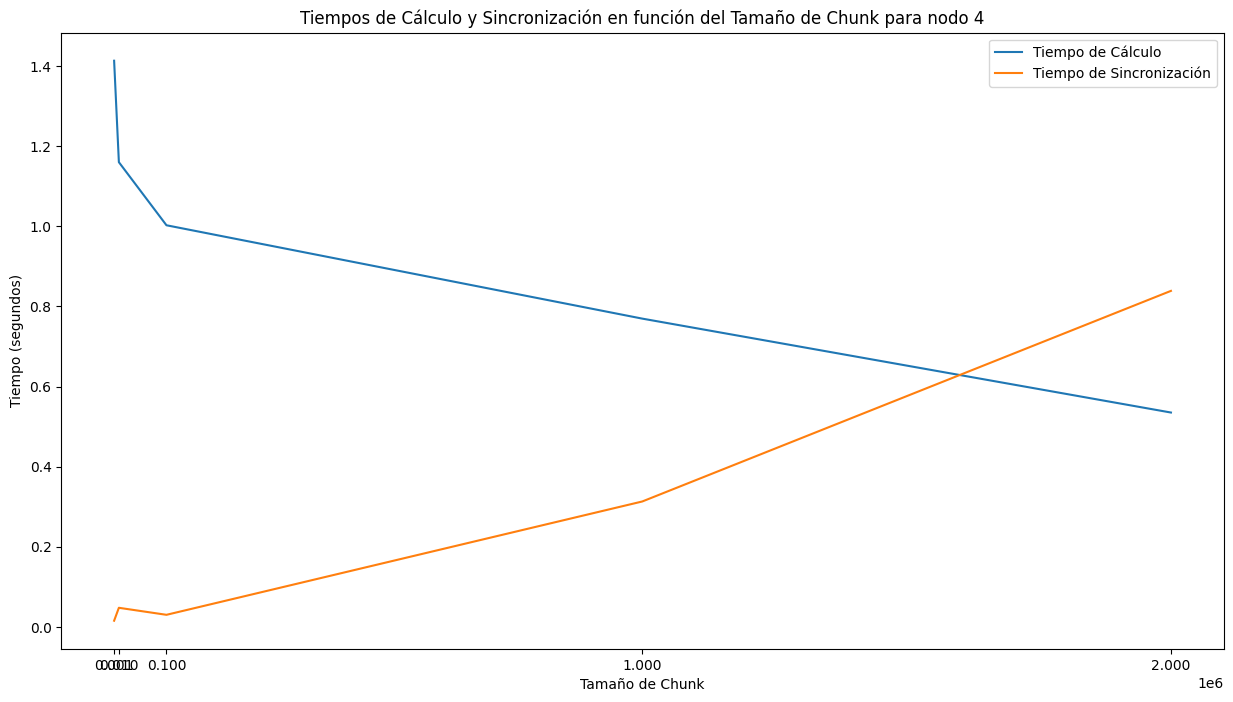

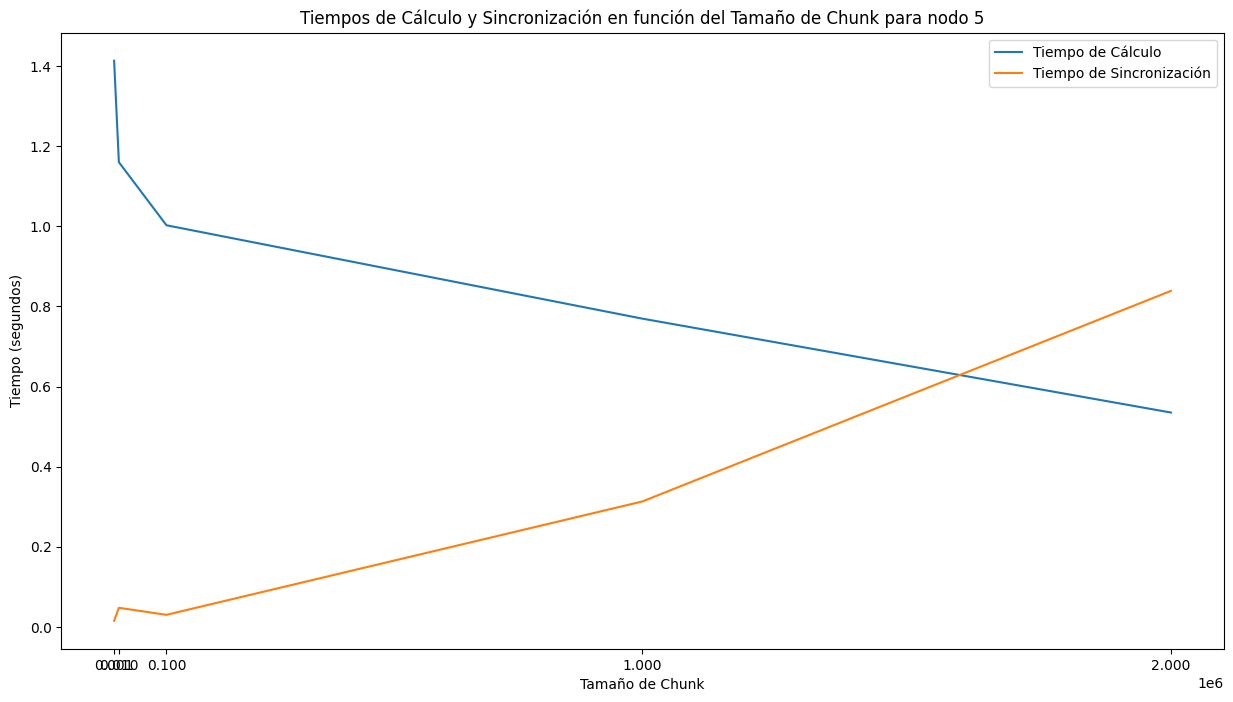

In [3]:
dfs = [df1, df2, df3, df4, df5]
cont = 1

for df in dfs:
    plt.figure(figsize=(15,8))
    # Gráfico para el tiempo de cálculo
    sns.lineplot(x="Chunk", y="tCalculo", data=df1, label="Tiempo de Cálculo")

    # Gráfico para el tiempo de sincronización
    sns.lineplot(x="Chunk", y="tComm", data=df1, label="Tiempo de Sincronización")

    plt.xlabel("Tamaño de Chunk")
    plt.ylabel("Tiempo (segundos)")
    plt.title(f"Tiempos de Cálculo y Sincronización en función del Tamaño de Chunk para nodo {cont}")
    plt.legend()

    plt.xticks(df1['Chunk'])
    plt.savefig(f"imgs/salida{cont}.png")
    cont +=1


<Axes: xlabel='Chunk', ylabel='tCalculo'>

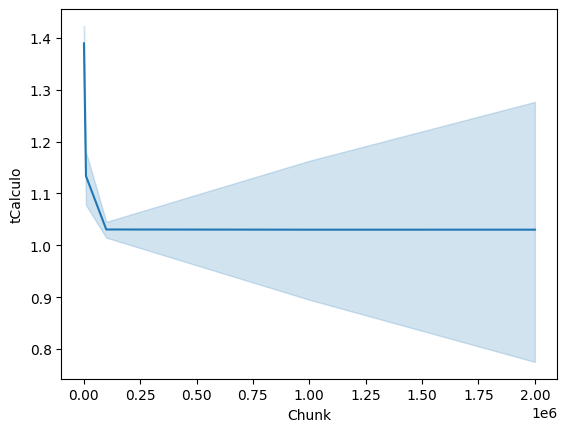

In [6]:
sns.lineplot(dfSalida, x="Chunk", y="tCalculo")


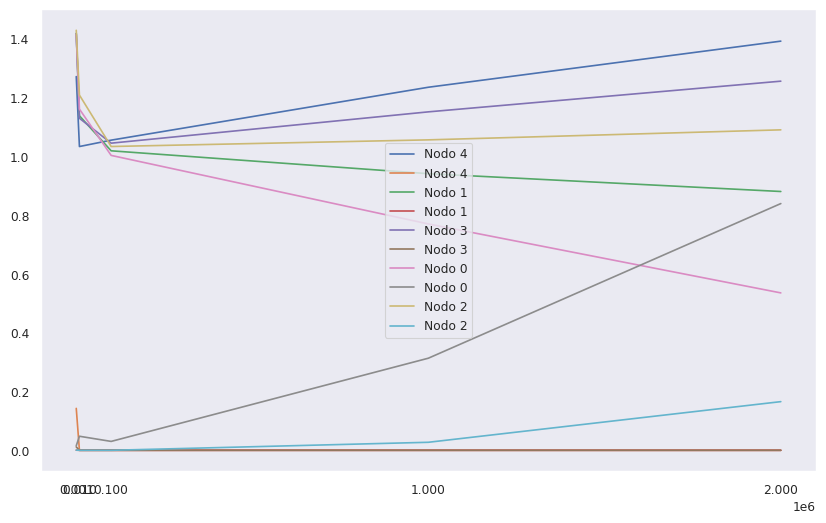

In [23]:
plt.figure(figsize=(10, 6))
for processor in dfSalida['Procesador'].unique():
    subset = dfSalida[dfSalida['Procesador'] == processor]
    plt.plot(subset['Chunk'], subset['tCalculo'], label=f'Nodo {processor}')
    plt.plot(subset['Chunk'], subset['tComm'], label=f'Nodo {processor}')

plt.legend()
plt.xticks(dfSalida["Chunk"].unique())
plt.show()


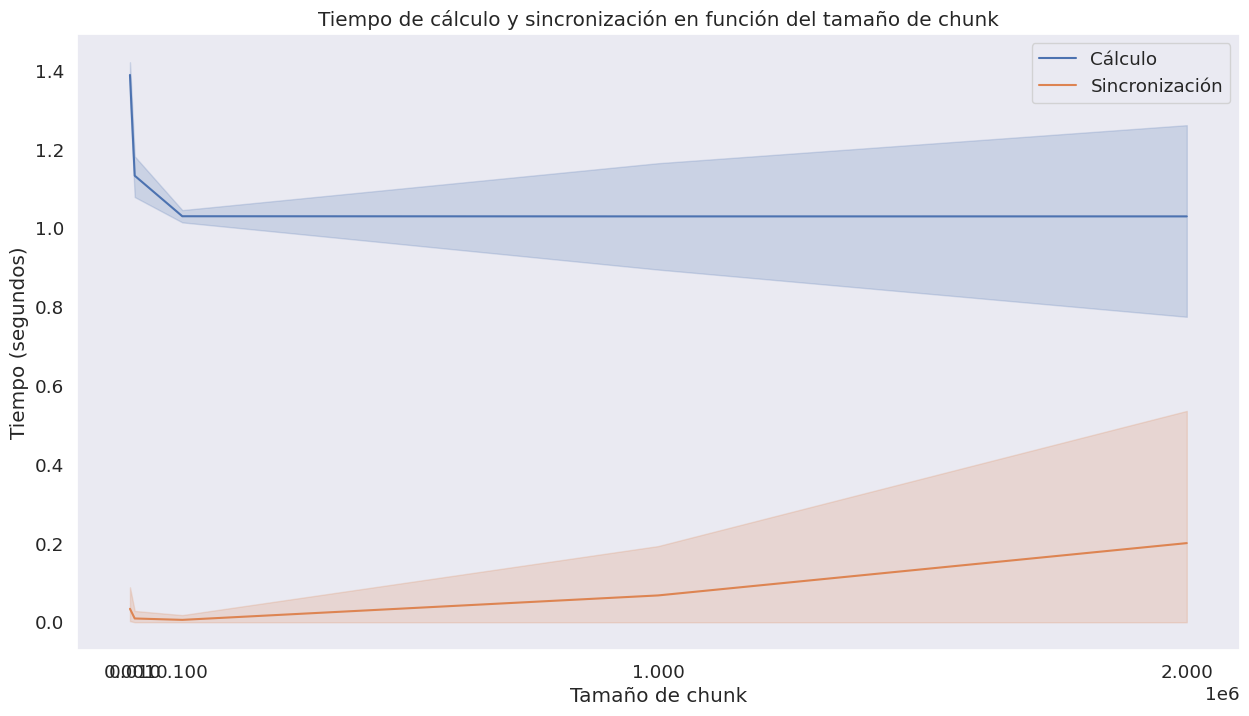

In [40]:
plt.figure(figsize=(15, 8))
sns.set(font_scale=1.2) 
sns.set_style("dark")
#sns.set_context("paper")
dfSalida["Nodo"] = str(dfSalida["Procesador"])
sns.lineplot(x='Chunk', y='tCalculo', data=dfSalida, label="Cálculo")
sns.lineplot(x='Chunk', y='tComm', data=dfSalida, label="Sincronización")

# Graficar tCalculo
# sns.lineplot(x='Chunk', y='tCalculo', data=dfSalida, label='tCalculo', hue="Procesador")
plt.legend()
plt.xticks(dfSalida["Chunk"].unique())
plt.title("Tiempo de cálculo y sincronización en función del tamaño de chunk")#, fontsize=16)
plt.ylabel("Tiempo (segundos)")#, fontsize=14)
plt.xlabel("Tamaño de chunk")#, fontsize=14)
plt.savefig("imgs/salida.png", dpi=100, bbox_inches='tight')
plt.show()